In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from sklearn.preprocessing import LabelEncoder

In [2]:
df = pd.read_csv('data-science-challenge/data.csv')

In [3]:
# are there any 0's in the document:
print(df.loc[df['Feature 1'] == 0.0])
print(df.loc[df['Feature 2'] == 0.0])
print(df.loc[df['Feature 3'] == 0.0])
print(df.loc[df['Feature 4'] == 0.0])
print(df.loc[df['Feature 5'] == 0.0])

Empty DataFrame
Columns: [User ID, Feature 1, Feature 2, Feature 3, Feature 4, Feature 5, Feature 6, Feature 7]
Index: []
Empty DataFrame
Columns: [User ID, Feature 1, Feature 2, Feature 3, Feature 4, Feature 5, Feature 6, Feature 7]
Index: []
Empty DataFrame
Columns: [User ID, Feature 1, Feature 2, Feature 3, Feature 4, Feature 5, Feature 6, Feature 7]
Index: []
Empty DataFrame
Columns: [User ID, Feature 1, Feature 2, Feature 3, Feature 4, Feature 5, Feature 6, Feature 7]
Index: []
Empty DataFrame
Columns: [User ID, Feature 1, Feature 2, Feature 3, Feature 4, Feature 5, Feature 6, Feature 7]
Index: []


In [4]:
# fill empty with 0s
df = df.fillna(0)

In [5]:
unique_user_id = set(df['User ID'])

In [6]:


# make sure there is nothing weird going on...
mins_1 = [min([i for i in df[df['User ID'] == usr]['Feature 1'] if i != None]) for usr in unique_user_id]
maxes_1 = [max([i for i in df[df['User ID'] == usr]['Feature 1'] if i != None]) for usr in unique_user_id]


mins_2 = [min([i for i in df[df['User ID'] == usr]['Feature 2'] if i != None]) for usr in unique_user_id]
maxes_2 = [max([i for i in df[df['User ID'] == usr]['Feature 2'] if i != None]) for usr in unique_user_id]


mins_3 = [min([i for i in df[df['User ID'] == usr]['Feature 3'] if i != None]) for usr in unique_user_id]
maxes_3 = [max([i for i in df[df['User ID'] == usr]['Feature 3'] if i != None]) for usr in unique_user_id]


mins_4 = [min([i for i in df[df['User ID'] == usr]['Feature 4'] if i != None]) for usr in unique_user_id]
maxes_4 = [max([i for i in df[df['User ID'] == usr]['Feature 4'] if i != None]) for usr in unique_user_id]


mins_5 = [min([i for i in df[df['User ID'] == usr]['Feature 5'] if i != None]) for usr in unique_user_id]
maxes_5 = [max([i for i in df[df['User ID'] == usr]['Feature 5'] if i != None]) for usr in unique_user_id]

In [7]:
stats = np.array([[mins_1, maxes_1], [mins_2, maxes_2], [mins_3, maxes_3], [mins_4, maxes_4], [mins_5, maxes_5]])

(5, 2, 1000)


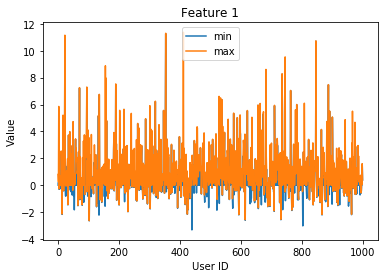

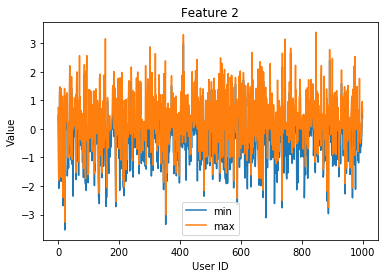

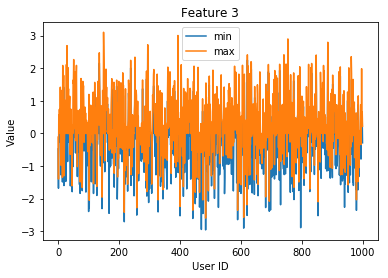

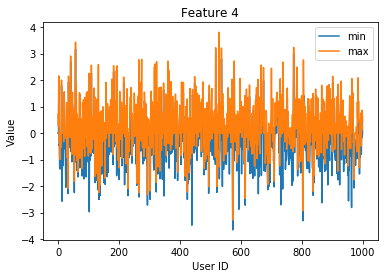

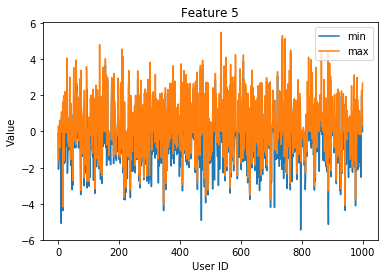

In [8]:
titles = ["Feature 1", "Feature 2", "Feature 3", "Feature 4","Feature 5"]

print(np.array(stats).shape)
for i in range(5):
    fig = plt.figure()
    ax = fig.add_subplot(111)    # The big subplot
    ax.plot(stats[i][0], label="min")
    ax.plot(stats[i][1], label="max")
    ax.set_xlabel('User ID')
    ax.set_ylabel('Value')
    ax.set_title(titles[i])
    ax.legend()
plt.show()
plt.close()


In [9]:
# data points vary a lot
# fillna with previos or next in columns wont work as 
# values among users vary by quite a bit
print((max(maxes_1), min(mins_1))) 
# normalising and fillna with 0 is also not great (for feature 1) since
# there is a big difference between the maxium and minimum number so most 
# values might be reduced a bitt too much
# potntially there might be outliers....
print((max(maxes_2), min(mins_2)))
print((max(maxes_3), min(mins_3)))
print((max(maxes_4), min(mins_4)))
print((max(maxes_5), min(mins_5)))

(11.379418487, -3.32978001235)
(3.38482400921, -3.5390080054000004)
(3.10454296974, -2.95932936634)
(3.8067885437599998, -3.6556159791600003)
(5.47421115576, -5.4305169901)


In [10]:
# I would not like to assign a max value to nans as this might 
# affect the distribution of points
maks_is_zero = [idx for idx, maxo in enumerate(maxes_1) if maxo == 0.0][0]
print(maks_is_zero)
print(mins_1[maks_is_zero]) 

6
-0.27462608855


In [11]:
# start over and use fillna with mean value instead of 0
df = pd.read_csv('data-science-challenge/data.csv')

In [12]:
#let's fill nans with means per user
# I am sure there is a better way to do this...
def fill_with_mean(df):
    dct = []
    for usr in unique_user_id:   
        mn_1 = df[df['User ID'] == usr]['Feature 1'].mean()
        feat_1 = df[df['User ID'] == usr]['Feature 1'].fillna(mn_1).tolist()
        mn_2 = df[df['User ID'] == usr]['Feature 1'].mean()
        feat_2 = df[df['User ID'] == usr]['Feature 1'].fillna(mn_2).tolist()
        mn_3 = df[df['User ID'] == usr]['Feature 1'].mean()
        feat_3 = df[df['User ID'] == usr]['Feature 1'].fillna(mn_3).tolist()
        mn_4 = df[df['User ID'] == usr]['Feature 1'].mean()
        feat_4 = df[df['User ID'] == usr]['Feature 1'].fillna(mn_4).tolist()
        mn_5 = df[df['User ID'] == usr]['Feature 1'].mean()
        feat_5 = df[df['User ID'] == usr]['Feature 1'].fillna(mn_5).tolist()
        feat_6 = df[df['User ID'] == usr]['Feature 6'].tolist()
        feat_7 = df[df['User ID'] == usr]['Feature 7'].tolist()
        for i in range(len(feat_1)):
            dct.append({
                'User ID': usr,
                'Feature 1': feat_1[i],
                'Feature 2': feat_2[i],
                'Feature 3': feat_3[i],
                'Feature 4': feat_4[i],
                'Feature 5': feat_5[i],
                'Feature 6': feat_6[i],
                'Feature 7': feat_7[i]
            })

    df = pd.DataFrame(dct)
    return df

In [13]:
print(df[df['User ID'] == 'WUPRXZY2OAYGIXAHXKQH'])

                 User ID  Feature 1  Feature 2  Feature 3  Feature 4  \
0   WUPRXZY2OAYGIXAHXKQH   2.038018  -1.106244   0.021878   1.060334   
1   WUPRXZY2OAYGIXAHXKQH   2.035986  -0.896107   0.120867   0.869520   
2   WUPRXZY2OAYGIXAHXKQH   2.041360  -1.168841   0.367205   0.935036   
3   WUPRXZY2OAYGIXAHXKQH   2.031916  -1.010094   0.370151   1.146873   
4   WUPRXZY2OAYGIXAHXKQH   2.036207  -1.132448   0.137019   1.005982   
5   WUPRXZY2OAYGIXAHXKQH   2.045354  -0.857319   0.220077   0.831239   
6   WUPRXZY2OAYGIXAHXKQH   2.053093  -1.178249   0.257706        NaN   
7   WUPRXZY2OAYGIXAHXKQH        NaN  -0.980889   0.348987   0.973465   
8   WUPRXZY2OAYGIXAHXKQH   2.035944  -1.035877   0.083382   0.916888   
9   WUPRXZY2OAYGIXAHXKQH   2.041375  -1.091391        NaN   1.126915   
10  WUPRXZY2OAYGIXAHXKQH   2.037715  -0.856696   0.170749   0.857111   
11  WUPRXZY2OAYGIXAHXKQH        NaN  -0.830593  -0.022515   0.935191   

    Feature 5                                          Feature 

In [14]:
# def preProcessDataset():
f = open('data-science-challenge/data.csv')
dataFrame = pd.read_csv(f)
dataFrame = fill_with_mean(dataFrame)
    # let's try without the text...it seems overly complex
dataFrame = dataFrame.drop(['Feature 6', 'User ID'], 1)
headers = list(dataFrame)
    
    # Store the labels separately
YIndex = headers.index('Feature 7')
# use 80% of the users
datasetMatrix = dataFrame.as_matrix()

#     feat_6 = dataFrame['Feature 6'].tolist()
#     labelEncoderFeat6 = LabelEncoder()
#     labelEncoderFeat6.fit(feat_6)
#     labelsFeat6 = labelEncoderFeat6.transform(feat_6)
#     dataFrame['Feature 6'] = pd.Series(labelsFeat6)

In [15]:
train = int(len(datasetMatrix)*0.80)
datasetTrain = datasetMatrix[:train]
datasetTrainWithoutLabels = np.delete(datasetTrain, YIndex, 1)

labels = datasetTrain[:, YIndex]

datasetTest = datasetMatrix[train:]
datasetTestWithoutLabels = np.delete(datasetTest, YIndex, 1)

trueLabels = datasetTest[:, YIndex]

In [16]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score

knn = KNeighborsClassifier()
knn.fit(datasetTrainWithoutLabels, labels)

predLabels = knn.predict(datasetTestWithoutLabels)
print(accuracy_score(trueLabels, predLabels))

0.5294413688978359


In [17]:
from sklearn.naive_bayes import GaussianNB
gnb = GaussianNB()

predLabels = gnb.fit(datasetTrainWithoutLabels, labels).predict(datasetTestWithoutLabels)
print(accuracy_score(trueLabels, predLabels))

0.44338198288877706


In [18]:
from sklearn import linear_model

logistic = linear_model.LogisticRegression(C=1e5)
logistic.fit(datasetTrainWithoutLabels, labels)

predLabels = logistic.predict(datasetTestWithoutLabels)
print(accuracy_score(trueLabels, predLabels))

0.6119778560644187


In [19]:
from sklearn import svm
# perhaps we want to normalize our data
# but first let's try different kernels
# and a GP

svc = svm.SVC(kernel='linear')
svc.fit(datasetTrainWithoutLabels, labels)

predLabels = svc.predict(datasetTestWithoutLabels)
print(accuracy_score(trueLabels, predLabels))

0.5898339204831404


In [20]:
# svc2 = svm.SVC(kernel='poly', degree=3)
# svc2.fit(datasetTrainWithoutLabels, labels)

# predLabels = svc2.predict(datasetTestWithoutLabels)
# print(accuracy_score(trueLabels, predLabels))

In [21]:
# svc = svm.SVC(kernel='rbf')
# svc.fit(datasetTrainWithoutLabels, labels)

# predLabels = svc.predict(datasetTestWithoutLabels)
# print(accuracy_score(trueLabels, predLabels))

In [22]:
print(__doc__)

# as in http://scikit-learn.org/stable/auto_examples/gaussian_process/plot_gpc.html

import numpy as np

from matplotlib import pyplot as plt

from sklearn.metrics.classification import accuracy_score, log_loss
from sklearn.gaussian_process import GaussianProcessClassifier
from sklearn.gaussian_process.kernels import RBF


# Generate data
# train_size = 50



# datasetTrainWithoutLabels
# labels
# datasetTestWithoutLabels
# trueLabels



# rng = np.random.RandomState(0)
# X = rng.uniform(0, 5, 100)[:, np.newaxis]
# y = np.array(X[:, 0] > 2.5, dtype=int)


# Specify Gaussian Processes with fixed and optimized hyperparameters
gp_fix = GaussianProcessClassifier(kernel=1.0 * RBF(length_scale=1.0),
                                   optimizer=None)
gp_fix.fit(datasetTrainWithoutLabels, labels)

gp_opt = GaussianProcessClassifier(kernel=1.0 * RBF(length_scale=1.0))
gp_opt.fit(datasetTrainWithoutLabels, labels)

print("Log Marginal Likelihood (initial): %.3f"
      % gp_fix.log_marginal_likelihood(gp_fix.kernel_.theta))
print("Log Marginal Likelihood (optimized): %.3f"
      % gp_opt.log_marginal_likelihood(gp_opt.kernel_.theta))

print("Accuracy: %.3f (initial) %.3f (optimized)"
      % (accuracy_score(labels, gp_fix.predict(datasetTrainWithoutLabels)),
         accuracy_score(labels, gp_opt.predict(datasetTrainWithoutLabels))))
print("Log-loss: %.3f (initial) %.3f (optimized)"
      % (log_loss(labels, gp_fix.predict_proba(datasetTrainWithoutLabels)[:, 1]),
         log_loss(labels, gp_opt.predict_proba(datasetTrainWithoutLabels)[:, 1])))


# Plot posteriors
plt.figure(0)
plt.scatter(datasetTrainWithoutLabels[:, 0], labels, c='k', label="Train data",
            edgecolors=(0, 0, 0))
plt.scatter(datasetTestWithoutLabels[:, 0], trueLabels, c='g', label="Test data",
            edgecolors=(0, 0, 0))
plt.plot(X_, gp_fix.predict_proba(datasetTestWithoutLabels)[:, 1], 'r',
         label="Initial kernel: %s" % gp_fix.kernel_)
plt.plot(X_, gp_opt.predict_proba(datasetTestWithoutLabels)[:, 1], 'b',
         label="Optimized kernel: %s" % gp_opt.kernel_)
plt.xlabel("Feature")
plt.ylabel("Class 1 probability")
plt.xlim(0, 5)
plt.ylim(-0.25, 1.5)
plt.legend(loc="best")

# Plot LML landscape
plt.figure(1)
theta0 = np.logspace(0, 8, 30)
theta1 = np.logspace(-1, 1, 29)
Theta0, Theta1 = np.meshgrid(theta0, theta1)
LML = [[gp_opt.log_marginal_likelihood(np.log([Theta0[i, j], Theta1[i, j]]))
        for i in range(Theta0.shape[0])] for j in range(Theta0.shape[1])]
LML = np.array(LML).T
plt.plot(np.exp(gp_fix.kernel_.theta)[0], np.exp(gp_fix.kernel_.theta)[1],
         'ko', zorder=10)
plt.plot(np.exp(gp_opt.kernel_.theta)[0], np.exp(gp_opt.kernel_.theta)[1],
         'ko', zorder=10)
plt.pcolor(Theta0, Theta1, LML)
plt.xscale("log")
plt.yscale("log")
plt.colorbar()
plt.xlabel("Magnitude")
plt.ylabel("Length-scale")
plt.title("Log-marginal-likelihood")

plt.show()

Automatically created module for IPython interactive environment


KeyboardInterrupt: 